In [1]:
# análise do erro em regime permanante
# entrada tipo rampa

In [11]:
import numpy as np
import control
import control.matlab
import math            
import cmath
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from control_utils import *

In [12]:
T = 1;
Gs = control.tf(1,[1, 1, 0]);
Gz = control.c2d(Gs,T);
FTMA = Gz;

In [13]:
# importante, o erro em regime permanente é calculado a partir da função de transferência de laço aberto

aux = control.minreal(control.tf([1, -1],[1, 0],T)*FTMA);  # onde tf([1 -1],[1 0],T) = (z-1)/z = 1-z^-1
[[n]],[[d]]= control.tfdata(aux);
kv = (np.polyval(n, 1)/np.polyval(d, 1))/T   #  substituindo 1 em aux
ess = 1/kv;

print("ess = \n",ess)

1 states have been removed from the model
ess = 
 1.0


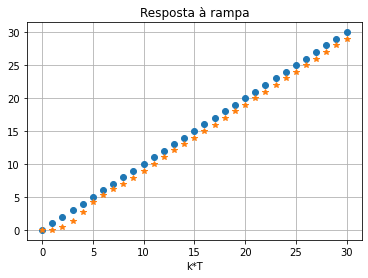

In [14]:
# erro pode ser verificado a partir da FTMF como sendo a diferença entre a entrada e a saída
# porém isto só é possível neste caso por que a realimentação é unitária
# caso não seja unitária, deve ser observado o sinal de saída do somador

FTMF = control.feedback(Gz,1);

tfinal = 30;
Kmax = int(tfinal/T+1);
t = np.linspace(0, tfinal, Kmax)
rampa = t;

y, t, x = control.matlab.lsim(FTMF, rampa, t);
plt.figure()
plt.plot(t, rampa,'o', t, y,'*')
plt.title("Resposta à rampa")
plt.xlabel("k*T")
plt.grid(True)
plt.show()

{'Mp': 39.94794295065054,
 'tp': 3,
 'ts5': 11,
 'ts2': 15,
 'tr': 4,
 'td': 2,
 'ess': -6.929104149566712e-05,
 'final_value_step_simulated': 1.0000692910414957,
 'final_value_step_theoretical': 1.0000000000000009}

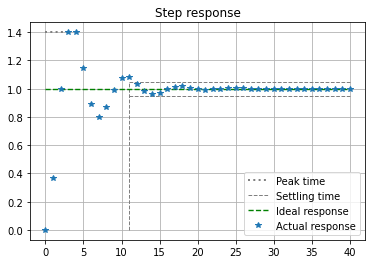

In [19]:
step_info(FTMF, 40)

In [6]:
erro = rampa[-1]-y[-1];
print("erro = \n",erro)

erro = 
 1.0008487354245972


# exercicio 2 lista 4
![](lista_4_ex_2.png)

/src/Exercícios Controle 2/05 (análise de sistemas)/../control_utils.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  K = np.polyval(n, 1)/np.polyval(d, 1)   #  lim z->1
/src/Exercícios Controle 2/05 (análise de sistemas)/../control_utils.py:171: RuntimeWarning: divide by zero encountered in true_divide
  metrics['ess_parabola'] = np.array(1)/K


1 states have been removed from the model
1 states have been removed from the model
System type: 1
Error analysis:
{
    "Kp": Infinity,
    "ess_degrau": 0.0,
    "ess_degrau_theorem": 0.0,
    "Kv": 0.4999999999999999,
    "ess_rampa": 2.0000000000000004,
    "ess_rampa_theorem": 1.9999999999999696,
    "Ka": 0,
    "ess_parabola": Infinity,
    "ess_parabola_theorem": Infinity
}


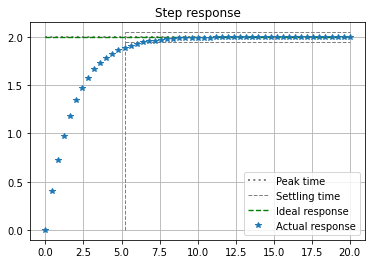

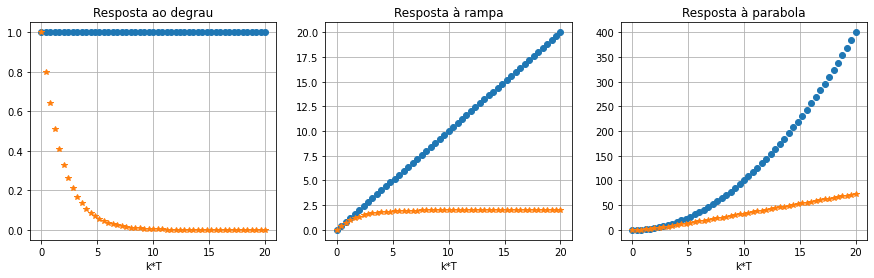

In [8]:
T = 0.4
Gs = control.tf([1], [1, 0])
Hs = control.tf([1], [2])
GHs = Gs*Hs

Gz = control.c2d(Gs, T, method='zoh')
GHz = control.c2d(GHs, T, method='zoh')
FTMA = GHz 
FTMF = Gz/(1 + GHz)
FTMF = FTMF.minreal()
step_info(FTMF, 20)

# Error analysis
_ = errors(FTMA=GHz, verbose=True, plot=True)

In [10]:
final_value(FTMF)

2.0000000000000004